In [1]:
import os
import collections

import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

''' Font type hack '''
'''
Link1: https://tex.stackexchange.com/questions/18687/how-to-generate-pdf-without-any-type3-fonts
Link2: http://phyletica.org/matplotlib-fonts/
'''
# plt.rcParams['text.usetex'] = True
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams["font.family"] = "Arial"

# plt.rc('font',**{'family':'sans-serif','serif':['Arial']})

%config InlineBackend.figure_format = 'retina' # render double resolution plot output for Retina screens
%matplotlib inline

In [2]:
# nodes_file = os.path.join('node2author.n2k.csv')
# words_file = os.path.join('word2name.n2k.csv')
# graph_file = os.path.join('temporalgraph.n2k.csv')
# graph_attr_file = os.path.join('temporalfeature-words.n2k.csv')

nodes_file = os.path.join('node2author.n10k.csv')
words_file = os.path.join('word2name.n10k.csv')
graph_file = os.path.join('temporalgraph.n10k.csv')
graph_attr_file = os.path.join('temporalfeature-words.n10k.csv')

In [3]:
nodes = []
with open(nodes_file, 'r') as f:
    for l in f:
        ts = l.strip('\n\r').split('\t')
        assert len(ts) == 4
        nodes.append(ts[0])
print(f'#nodes: {len(nodes)}')
node2idx = {node: idx for idx, node in enumerate(nodes)}

words = []
with open(words_file, 'r') as f:
    for l in f:
        ts = l.strip('\n\r').split('\t')
        assert len(ts) == 4
        words.append(ts[0])
print(f'#words: {len(words)}')
word2idx = {word: idx for idx, word in enumerate(words)}

year2node2neig = collections.defaultdict(lambda: collections.defaultdict(set))
with open(graph_file, 'r') as f:
    for l in f:
        ts = l.strip('\n\r').split(',')
        assert len(ts) == 4
        year = ts[0]
        node_n = ts[1]
        node_v = ts[2]
        assert node_n in node2idx and node_v in node2idx
        year2node2neig[year][node_n].add(node_v)
        year2node2neig[year][node_v].add(node_n)

year2node2word = collections.defaultdict(lambda: collections.defaultdict(set))
with open(graph_attr_file, 'r') as f:
    for l in f:
        ts = l.strip('\n\r').split(',')
        assert len(ts) == 4
        year = ts[0]
        node = ts[1]
        word = ts[2]
        assert node in node2idx and word in word2idx
        year2node2word[year][node].add(word)

#nodes: 9854
#words: 6442


0.67
0.52
0.32


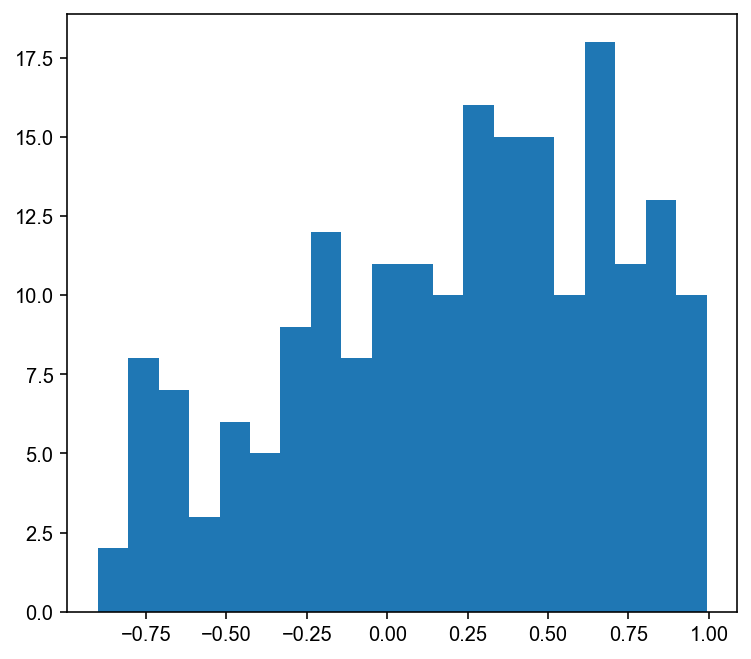

In [4]:
num_users = 200
start_year = 2005

neigh_jaccards = []
for node in nodes[:num_users]:
    _jaccards = []
    for _y in range(start_year, 2010, 1):
        curr_neigh = year2node2neig[str(_y)][node]
        next_neigh = year2node2neig[str(_y + 1)][node]
#         assert len(curr_neigh) > 0, f'{_y} {node} {curr_neigh}'
#         assert len(next_neigh) > 0, f'{_y} {node} {next_neigh}'
        j = (len(curr_neigh.intersection(next_neigh)) / len(curr_neigh.union(next_neigh))) if len(curr_neigh.union(next_neigh)) >= 0.001 else 0
        _jaccards.append(j)
    neigh_jaccards.append(_jaccards)

words_jaccards = []
for node in nodes[:num_users]:
    _jaccards = []
    for _y in range(start_year, 2010, 1):
        curr_words = year2node2word[str(_y)][node]
        next_words = year2node2word[str(_y + 1)][node]
#         assert len(curr_words) > 0, f'{_y} {node} {curr_words}'
#         assert len(next_words) > 0, f'{_y} {node} {next_words}'
        j = (len(curr_words.intersection(next_words)) / len(curr_words.union(next_words))) if len(curr_words.union(next_words)) >= 0.001 else 0
        _jaccards.append(j)
    words_jaccards.append(_jaccards)
# print(words_jaccards)

pearsonrs = []
for u in range(num_users):
#     input1, input2 = [], []
#     for j in range(len(neigh_jaccards[u])):
#         if neigh_jaccards[u][j] > 0 and words_jaccards[u][j] > 0:
#             input1.append(neigh_jaccards[u][j])
#             input2.append(words_jaccards[u][j])
#     if len(input1) >= 2 and len(input2) >= 2:
#         p = stats.pearsonr(input1, input2)
    p = stats.pearsonr(neigh_jaccards[u], words_jaccards[u])
    pearsonrs.append(p[0])
# print(sorted(pearsonrs))
pearsonrs = np.array(pearsonrs)
print(f'{np.sum(pearsonrs >= 0)/len(pearsonrs)}')
print(f'{np.sum(pearsonrs >= 0.25)/len(pearsonrs)}')
print(f'{np.sum(pearsonrs >= 0.5)/len(pearsonrs)}')

fig, ax1 = plt.subplots(figsize=(6, 5.5))
ax1.hist(pearsonrs, bins=20)
plt.show()

In [5]:
print(np.min(pearsonrs), np.max(pearsonrs))

-0.8995204439455723 0.9926893815937208


In [41]:
bins = np.arange(-0.9, 1, 0.2)
print(bins)
inds = np.digitize(pearsonrs, bins)
print(inds[:100])

[-0.9 -0.7 -0.5 -0.3 -0.1  0.1  0.3  0.5  0.7  0.9]
[10  9  8  5  8  4  9  6  6 10  5  4  7  9  6  6  9  7  5  7  2  8  3  7
  8  5  9  2  6  8  2  7  8  7 10  5  4  5  9  9  5  2  7  8  6  3  4  8
  6  5  5  7  1 10  2  5  9  4  7  5  4  7  3  8  5  9  2  3  8 10  7  9
  2  7  8  9  9  4  9  8  7  6  4  6  6  7  6  9  8  7 10  6  5  1 10  3
  1  7  4  7]


In [13]:
print(np.arange(-0.9, 1, 0.2))

[-0.9 -0.7 -0.5 -0.3 -0.1  0.1  0.3  0.5  0.7  0.9]


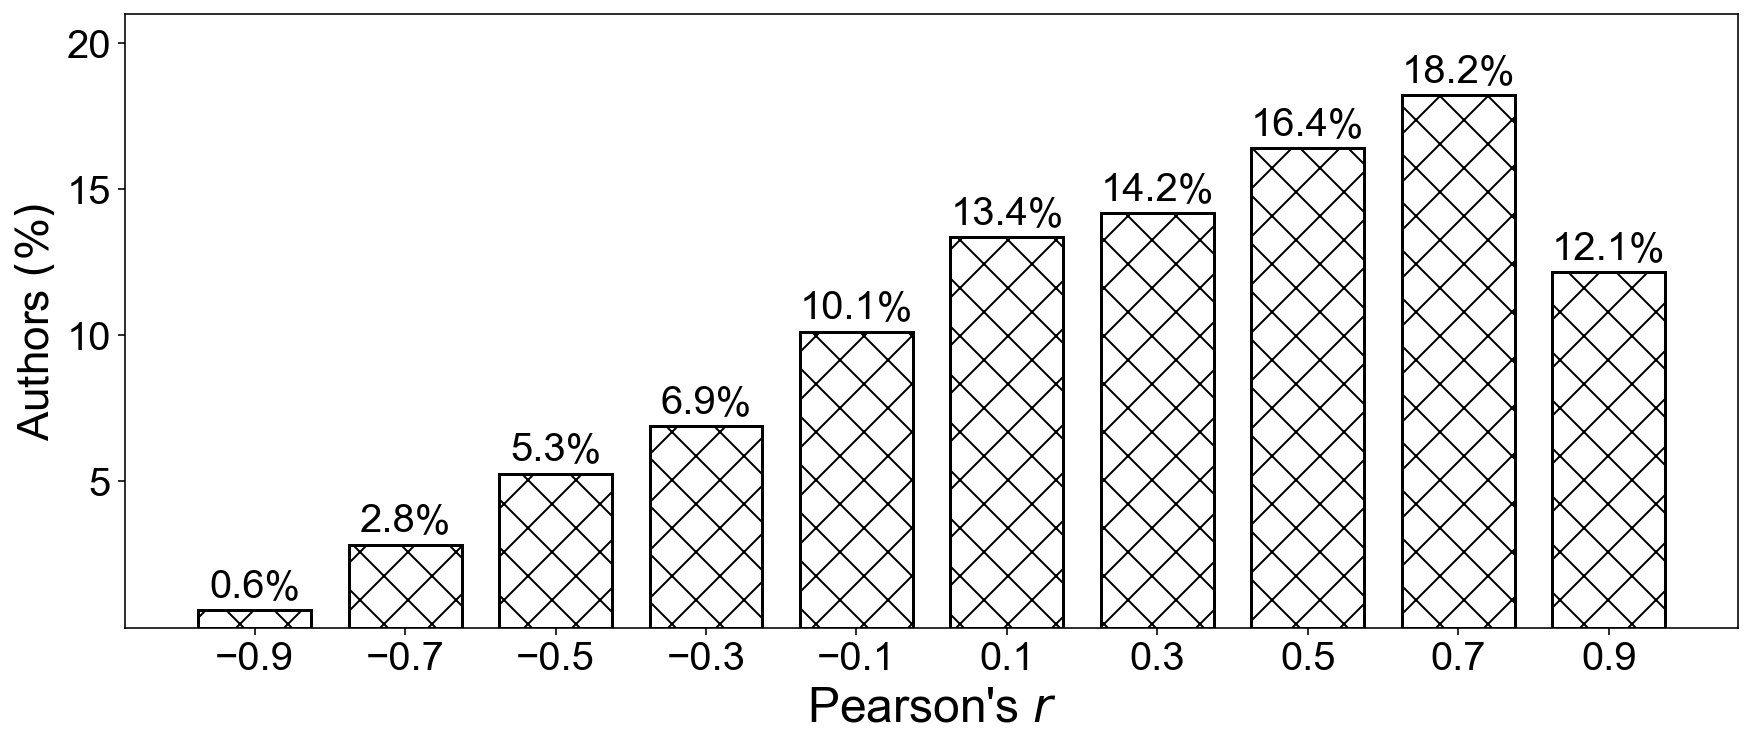

In [52]:
_hp = [ "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*" ]
width = 0.15  # the width of the bars
fig, ax = plt.subplots(figsize=(12, 5))

# precents1 = [0.3106796116504854, 0.22330097087378642, 0.1553398058252427, 0.06796116504854369, 0.13074092951, 
#              0.04854368932038835, 0.009708737864077669, 0.02912621359223301, 0.0245988763113245, 0.0]

precents1 = np.array([3, 14, 26, 34, 50, 66, 70, 81, 90, 60])
precents1 = precents1 / np.sum(precents1)

x = np.arange(-0.9, 1, 0.2)
y1 = np.array(precents1)
labels1 = [f'{p*100:.1f}%' for p in precents1]

bar1 = ax.bar(x , y1, width, 
              color='w', edgecolor='black', hatch=_hp[5], linewidth=1.5,
              label='Bitcoin-OTC')

def autolabel(rects, labels, _x_offset=0):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for i, rect in enumerate(rects):
        height = rect.get_height()
        ax.annotate(labels[i],
                    xy=(rect.get_x() + rect.get_width() / 2 + _x_offset, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=20)

autolabel(bar1, labels1)

ax.xaxis.set_ticks(list(np.arange(-0.9, 1, 0.2)))
ax.set_ylim(0, 0.21)
ax.yaxis.set_ticks(np.arange(0.05, 0.21, 0.05))
ax.set_yticklabels(['5','10', '15', '20'])
ax.yaxis.set_tick_params(labelsize=20)
ax.xaxis.set_tick_params(labelsize=20)

ax.set_xlabel(r"Pearson's $r$", fontsize=24)
ax.set_ylabel(r'Authors $(\%)$', fontsize=22)
# ax.legend(fontsize=20)

fig.tight_layout(pad=0, h_pad=0, w_pad=0)
fig.savefig(os.path.join('.', 'motivation-correlation.png'), bbox_inches='tight', dpi=200)